In [5]:
# --------- Skeletonization by medial axis transform --------
from scipy import ndimage as ndi

# def medial_axis_3d(image, mask=None, return_distance=False, *, random_state=None, spacing=None):
#     global _eight_connect
#     if mask is None:
#         masked_image = image.astype(bool)
#     else:
#         masked_image = image.astype(bool).copy()
#         masked_image[~mask] = False
#     #
#     # Build lookup table - three conditions
#     # 1. Keep only positive pixels (center_is_foreground array).
#     # AND
#     # 2. Keep if removing the pixel results in a different connectivity
#     # (if the number of connected components is different with and
#     # without the central pixel)
#     # OR
#     # 3. Keep if # pixels in neighborhood is 2 or less
#     # Note that table is independent of image
    
#     # Build distance transform
#     distance = ndi.distance_transform_edt(masked_image,sampling=spacing)

#     if return_distance:
#         store_distance = distance.copy()

#     # Corners
#     # The processing order along the edge is critical to the shape of the
#     # resulting skeleton: if you process a corner first, that corner will
#     # be eroded and the skeleton will miss the arm from that corner. Pixels
#     # with fewer neighbors are more "cornery" and should be processed last.
#     # We use a cornerness_table lookup table where the score of a
#     # configuration is the number of background (0-value) pixels in the
#     # 3x3 neighborhood
#     #cornerness_table = np.array([9 - np.sum(_pattern_of(index))
#                                  # for index in range(512)])
#     # print('cornerness_table',cornerness_table)
#     # corner_score = _table_lookup(masked_image, cornerness_table)
#     corner_score=corner_score_3d(masked_image)
#     # print('corner_score',corner_score)
#     # Define arrays for inner loop
#     i, j, z = np.mgrid[0:image.shape[0], 0:image.shape[1],0:image.shape[2]]
#     # i, j = np.mgrid[0:image.shape[0], 0:image.shape[1]]
#     result = masked_image.copy()
#     distance = distance[result]
#     i = np.ascontiguousarray(i[result], dtype=np.intp)
#     j = np.ascontiguousarray(j[result], dtype=np.intp)
#     z = np.ascontiguousarray(z[result], dtype=np.intp)
#     result = np.ascontiguousarray(result, np.uint8)

#     # Determine the order in which pixels are processed.
#     # We use a random # for tiebreaking. Assign each pixel in the image a
#     # predictable, random # so that masking doesn't affect arbitrary choices
#     # of skeletons
#     #
#     generator = np.random.default_rng(random_state)
#     tiebreaker = generator.permutation(np.arange(masked_image.sum()))
#     order = np.lexsort((tiebreaker,
#                         i,j,z,
#                         corner_score[masked_image],
#                         distance))
#     order = np.ascontiguousarray(order, dtype=np.int32)
    
    
#     # Remove pixels not belonging to the medial axis
#     import skimage.morphology._skeletonize_3d_cy as cy

#     result=cy._skeletonize_loop_3d(result, i, j, z, order,np.array(spacing),False)

#     result = result.astype(bool)
#     if mask is not None:
#         result[~mask] = image[~mask]
#     if return_distance:
#         return result, store_distance
#     else:
#         return result


def medial_axis_3d(image, mask=None, return_distance=False, *, random_state=None, spacing=None,changes=1000):
    global _eight_connect
    if mask is None:
        masked_image = image.astype(bool)
    else:
        masked_image = image.astype(bool).copy()
        masked_image[~mask] = False
    result = masked_image.copy()
    result = np.ascontiguousarray(result, np.uint8)
    
    
    # Remove pixels not belonging to the medial axis
    import skimage.morphology._skeletonize_3d_cy as cy
    
    result=cy._skeletonize_loop_3d(result, changes,np.array(spacing),False)

    result = result.astype(bool)
    if mask is not None:
        result[~mask] = image[~mask]
    if return_distance:
        return result, store_distance
    else:
        return result

def corner_score_3d(img):
    import itertools
    corner=np.zeros(img.shape,int)
    img=img.astype(bool)
    rows,cols,zs=img.shape
    for ii,jj,zz in itertools.product(range(rows),range(cols),range(zs)):
        # print(f'ii={ii} jj={jj} zz={zz}')
        for iii,jjj,zzz in itertools.product(range(-1,2),range(-1,2),range(-1,2)):
            ax=ii+iii
            ay=jj+jjj
            az=zz+zzz
            if ax<0 or ay<0 or az<0:
                corner[ii,jj,zz]+=1
                continue
            if ax>=rows or ay>=cols or az>=zs:
                corner[ii,jj,zz]+=1
                continue
            # if zzz==0 and zz==1:
            #     print(f'ii={ii} jj={jj} zz={zz}      {iii},\t{jjj},\t{zzz}\t {img[ax,ay,az]}')
            if not img[ax,ay,az]:
                corner[ii,jj,zz]+=1
            # else:
            #     print(ii,jj,zz)
             
    return corner


In [2]:
# masked_image=img2_3d.astype(bool)
# image=masked_image
# spacing=[1,2,1]
# distance = ndi.distance_transform_edt(masked_image,sampling=spacing)
# dst = ndi.distance_transform_edt(masked_image,sampling=spacing)

# corner_score=corner_score_3d(masked_image)
# i, j, z = np.mgrid[0:image.shape[0], 0:image.shape[1],0:image.shape[2]]
# result = masked_image.copy()
# distance = distance[result]
# i = np.ascontiguousarray(i[result], dtype=np.intp)
# j = np.ascontiguousarray(j[result], dtype=np.intp)
# z = np.ascontiguousarray(z[result], dtype=np.intp)

# # Determine the order in which pixels are processed.
# # We use a random # for tiebreaking. Assign each pixel in the image a
# # predictable, random # so that masking doesn't affect arbitrary choices
# # of skeletons
# #
# generator = np.random.default_rng(1)
# tiebreaker = generator.permutation(np.arange(masked_image.sum()))
# order = np.lexsort((tiebreaker,
#                     i,j,z,
#                     corner_score[masked_image],
#                     distance))

# newi=np.zeros(image.shape)
# for v,oi in enumerate(order):
#     ii=i[oi]
#     jj=j[oi]
#     zz=z[oi]
#     newi[(ii,jj,zz)]=v+1
    
# # display_skel(newi/newi.max()*25,newi*0,spacing)
# plt.imshow(newi[...,0],vmin=0,vmax=6)
# plt.show()
# plt.imshow(dst[...,0],vmin=0,vmax=dst.max()/4*3)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import draw
# from skimage.morphology import skeletonize
siz=200
img1 = np.zeros((siz,siz))
rr, cc = draw.ellipse(siz/2, siz/2, siz*.4, siz*.4, img1.shape)
img1[rr, cc] = 1
scale1=(1,1)

img2 = np.zeros((siz, siz//2))
rr, cc = draw.ellipse(siz/2, siz/4, siz*.4, siz*.2, img2.shape)
img2[rr, cc] = 1
scale2=(1,2)

def display_skel(img,skeleton,spacing):
      
    if img.ndim==2:
        b=skeleton+img
        # b=myutils.array_trim(b,margin=4)
        plt.imshow(b,aspect=spacing[0]/spacing[1])
        plt.show()
    else:
        import k3d        
        plot = k3d.plot()
        plot+= k3d.voxels(img, opacity=0.1,scaling=spacing)
        plot+= k3d.voxels(skeleton, opacity=1,scaling=spacing)
        plot.display()
def img_to_3d(img,zcount=10,margin=1):
    newi=np.zeros((img.shape[0],img.shape[1],zcount+margin*2))
    for i in range(margin,zcount+margin):
        newi[...,i]=img
    return newi

[200, 100, 22, 0, 0, 0, 0, 0]
[6, 6, 6, 6, 2, 2] [5, 5, 5, 5, 1, 1] [6, 6, 6, 6, 2, 2]


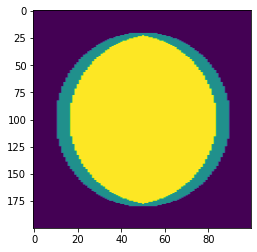

In [50]:
numz=20
img2_3d=img_to_3d(img2,numz,1)
img1_3d=img_to_3d(img1,numz,1)
# img2_3d=img2.reshape(img2.shape[0],img2.shape[1],1)
scale2_3d=[1,2,1]
scale1_3d=[1,1,1]
# x,y,z
# x,z
# skel=medial_axis_3d(img1_3d,spacing=scale1_3d)
# skel=medial_axis_3d(img1_3d,spacing=scale1_3d)

# display_skel(img1_3d,skel,scale1_3d[::-1])
# # import skimage
# skel=skimage.morphology.skeletonize(img1_3d)
# display_skel(img1_3d,skel>0,scale1_3d[::-1])

# skel=medial_axis_3d(img2_3d,spacing=scale2_3d).astype(int)
skel=medial_axis_3d(img2,spacing=[1,1,5],changes=6).astype(int)
plt.imshow((img2_3d+skel)[...,11],aspect=.5)
# display_skel(img2_3d,skel,scale2_3d[::-1])
# skel=medial_axis_3d(img2_3d,spacing=[1,1,1]).astype(int)
# display_skel(img2_3d,skel,scale2_3d[::-1])
# import skimage
# skel=skimage.morphology.skeletonize(img2_3d)
# display_skel(img2_3d,skel>0,scale2_3d[::-1])

(1, 2)

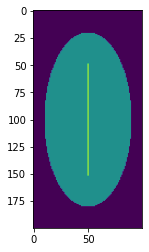

In [107]:
import skimage
scale2_3d=[.9,0.9,0.9]
img2s=skimage.transform.rescale(img2_3d,scale2_3d,mode='edge')>0
skel2=skimage.morphology.skeletonize_3d(img2s)>0
skel=skimage.transform.rescale(skel2,1/np.array(scale2_3d),mode='edge')>0
plt.imshow((img2_3d+skel*1)[...,10])
scale2


In [105]:
skel2.sum()

1

In [ ]:
spacing=[.7,1.5,5]
step_allowed=[0]*7
for i in range(3):
    step_allowed[i*2+1]=max(spacing)/spacing[i]
    step_allowed[i*2+2]=max(spacing)/spacing[i]

max_allowd=step_allowed.copy()
print(max_allowd)
info=[0]*7

for _ in range(100):
 
    if all([info[curr_border]>=max_allowd[curr_border] for curr_border in  range(1,7)]):
        for curr_border in  range(1,7):
            max_allowd[curr_border]+=step_allowed[curr_border]
    for curr_border in  range(1,7):
    # mx=info.min()
        if info[curr_border] >=max_allowd[curr_border]:
            continue
        info[curr_border]+=1
        print(curr_border,end=' ')
    # print(info,np.all(info>max_allowd))
    # if not border_step_change:
    
        # print(max_allowd)

info,np.array(info)/min(info[1:])